# Задача 1 (2 балла)

Чтение данных
Прочитайте данные из файла spam.csv используя средства модуля pandas. В первом столбце пометка о роде письма (spam/ham). Будем считать, что все письма с пометкой spam лежать в первом классе, а остальные в нулевом. Во второй колонке текст сообщения. Отобразите таблицу в следующем виде

In [1]:
import pandas as pd

Читаем файл.

In [2]:
df = pd.read_csv('spam.csv', encoding='latin-1')

Переименовываем колонки

In [3]:
df_renamed = df.rename(columns={"v1": "class", "v2": "text"})

Удаляем пустые колонки

In [4]:
df_removed = df_renamed.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)

Создаем переменные, в которые вложено содержимое колонок

In [5]:
col_text = df_removed['text']
col_class = df_removed['class']

Создаем новый DataFrame, в которые добавляем колонки в нужной нам последовательности.

In [6]:
data_set = {}
df_new = pd.DataFrame(data = data_set)
df_new = df_new.assign(text=col_text, clas=col_class)
df_new_ren = df_new.rename(columns={"clas": "class"})

Заменяем все записи ham на 0 и все записи spam на 1.

In [7]:
import re
no_spam = df_new_ren.replace(r'spam', '1')
no_ham = no_spam.replace(r'ham', '0')
df_1 = no_ham

# Задача 2 (3 балла)

Предобработка
Перевидите все буквы в нижний регистр.
С помошью регулярных выражений почистите текст отставляя только слова (удалите знаки припенания, а также все числа можно заменить на N и т.п.).
Оформите это в виде функции, которая принимает на вход некоторый список текстов и возвращает, соответственно, предобработанный список текстов.
Преобразуйте таблицу с данными, так чтобы в ней содержались предобработанные тексты (далее мы будем работать только с ними).

In [8]:
import re

def normalize(i):
    i = i.lower()
    i = re.sub('\d+', 'N', i)
    string = re.findall('\s\w+', i)
    return ' '.join(string)

def predpr(dataset):
    for i in dataset.text:
        dataset.text = dataset.text.replace(i, normalize(i))
    return dataset
df_predpr = predpr(df_1)

def predpr(text):
    def normalize(i):
        i = i.lower()
        i = re.sub('\d+', 'N', i)
        string = re.findall('\s\w+', i)
        return ''.join(string)
    for n in text:
        result = text.replace(n, normalize(n))
    return result
df_predpr = predpr(df_1)

# Задача 3 (3 балла)

Формирование словаря
Сформируйте словарь, ключами которого являются слова встречающееся в тексте, а значениями -- колличество раз, которое они встретились в корпусе текста.
Оформите это в виде функции, которая принимает на вход список текстов и возвращает словарь.
Какой размер словаря вы получили?

Создаем функцию, которая создает словарь. Но функция не проходит по всем строкам таблицы, поэтому следом за ней следует цикл, которые заставляет ее проходить по везде и считать слова, объединяя словари.
Длина: 7421

In [9]:
def make_dict(text):
    dct = {}
    for i in text:
        for d in i.split():
            if d not in dct:
                dct[d] = 1
            else: dct[d] += 1
    return dct
        
my_dct = make_dict(df_predpr['text'])
len(my_dct)

7490

# Задача 4 (2 балла)

Удаление стоп-слов
Отсортируйте слова по убыванию частоты их встречаемости в текстах.
С помощью модуля matplotlib.pyplot постройте график частот встречаемости слов в тексте.
Распечатайте топ-10 слов и их частоты.
Какие слова чаще всего встречаются в тексте? Значимые ли это слова?

In [10]:
#создаем отсортированный лист.
sorted_lst = sorted(my_dct.items(), key = lambda x: x[1], reverse=True)

Рисуем график частотности слов. Какие именно слова появляются с какой частотой на нем не видно, но видно, что, в целом, все слова более-менее одинаково встречаются.

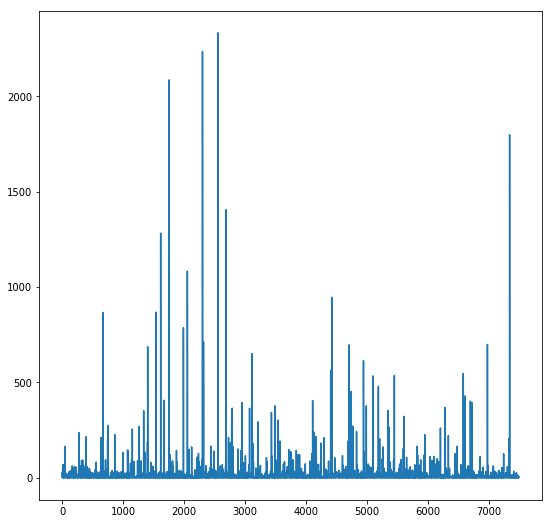

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
l2 = []
for i in my_dct.values():
    l2.append(int(i))
plt.figure(figsize=(9, 9))
plt.plot(l2)


Печатаем наш отсортированный список, точнее, первые десять:

In [12]:
print (sorted_lst[:10])

[('i', 2334), ('to', 2236), ('you', 2087), ('N', 1799), ('a', 1406), ('the', 1283), ('u', 1084), ('and', 947), ('in', 869), ('is', 867)]


В тексте чаще всего встречаются местоимения, предлоги и артикли. Это не значимые слова - скорее всего они так же часто будут встречаться в любом другом тексте.

# Задача 5 (5 баллов)

Функциия предобработки и удаление стоп-слов.
Для удаления стоп-слов можно использовать модуль nltk. Импортируйте stopwords из nltk.corpus, далее чтобы получить список английских стоп-слов нужно сделать stopwords.words('english').
Перепишите функцию предобрабитки так, чтобы она на вход принимала список текстов и список стоп-слов, чистела текст (в том числе удаляла стоп-слова), возвращала список предобработанных текстов.
Преобразуйте таблицу с данными, так чтобы в ней содержались новые предобработанные тексты (далее мы будем работать только с ними).
Сформируйте словарь.
Постройте график частот встречаемости слов в тексте.
Распечатайте топ-10 слов и их частоты.
Какой размер словаря вы получили теперь? Остались ли ещё высокочастотные неинформативные слова? Что это за слова? Добавте их в список стоп-слов и повторите процедуру.

In [13]:
#импортируем список стоп-слов, ура
import nltk
from nltk.corpus import stopwords
stop_w = stopwords.words('english')

In [14]:
def normalize(i):
    i = i.lower()
    i = re.sub('\d+', 'N', i)
    string = re.findall('\s\w+', i)
    return ' '.join(string)

In [15]:
def predpr_stw(dataset, stop_w):
    result = []
    for i in dataset.text:
        i = i.replace(i, normalize(i))      
        lst_w = i.split(' ')
        result.append(' '.join([word for word in lst_w if (word not in stop_w)]))
    return result

df_stw = predpr_stw(df_1, stop_w)

Определяем длину нашего нового словаря, в котором удалены стоп-слова.
Длина: 7277 - на 200 слов короче!

In [16]:
dct_stw = make_dict(df_stw)
len(dct_stw)

7277

Сортируем новый словарь по алфавиту

In [17]:
sorted_lst_1 = sorted(dct_stw.items(), key = lambda x: x[1], reverse=True)

Теперь видно, что у нас остались более осмысленные слова.

In [18]:
print (sorted_lst_1[:10])

[('n', 2498), ('u', 1084), ('call', 561), ('get', 368), ('ur', 365), ('å', 293), ('go', 275), ('know', 261), ('free', 243), ('like', 239)]


Но все равно в этом списке есть еще неинформативные слова. Добавим их в список стоп-слов и прогоним еще раз очистку.
Наш список сократился на 5 слов, ура.

In [19]:
new_stop_w = ['n', 'u', 'ur', 'å', 'like']
stop_w.extend(new_stop_w)

# Задача 6 (5 баллов). Удаление низкочастотных слов

По сформированому на предыдущем шаге словарю, посмотрите какой процент слов встречается больше одного раза. Нужны ли нам слова которые встретились только один раз?
Преобразуйте функцию предобработки таким образом, что бы в ней, кроме всего прочего, формировался словарь и удалялись слишком редкие слова.
Преобразуйте таблицу с данными, так чтобы в ней содержались новые предобработанные тексты (далее мы будем работать только с ними).
Сформируйте словарь. Каков размер словаря теперь?

In [20]:
pr = 0
for i in dct_stw.values():
    if i == 1:
        #print (i)
        pr += 1
pr

3687

In [21]:
procent = pr // (len(dct_stw) / 100)
procent

50.0

У меня получилось удалить слова встречающиеся один раз из словаря, но как вернуть их в датасет по строкам идей пока нет. 

In [46]:
def make_dict(text):
    dct = {}
    for i in text:
        for d in i.split():
            if d not in dct:
                dct[d] = 1
            else: dct[d] += 1
    for i in dct:
        if dct[i] == 1:
            dct[i] = []
    dct = { k : v for k,v in dct.items() if v}
    return dct
        
my_dct1 = make_dict(df_predpr['text'])
len(my_dct1)

3764